{20: 7, 19: 111, 18: 310, 17: 687, 16: 993, 15: 936}


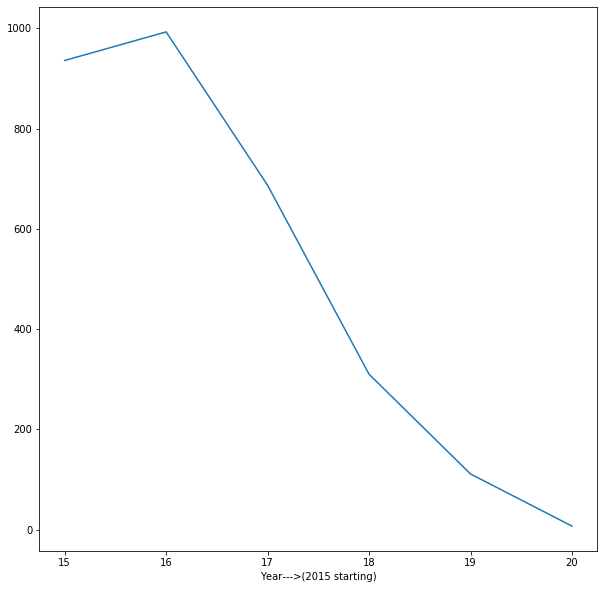

20 7
19 111
18 310
17 687
16 993
15 936


In [283]:
#Problem-1
#to find-->total fundings in a year
#to do-->plot a graph fundings(y) across year(x)
#print year wise total fundings in ascending order
#year1 funding1
#Date feature is tricky

#solution
#at some places dates are 01/05/2015 and somewhere 01/5/2015 and // is present
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
with open('Datasets/startup_funding.csv',encoding='utf8') as file_obj:
    file_data=csv.DictReader(file_obj,skipinitialspace=True)
    row=list(file_data)
    date=[]
    for i in row:
        date.append(i['Date dd/mm/yyyy'][len(i['Date dd/mm/yyyy'])-3:])
    np_date=np.array(date,dtype=int)
    fund_dic=dict()
    for i in np_date:
        if i in fund_dic.keys():
            fund_dic[i]+=1
        else:
            fund_dic[i]=1
    print(fund_dic)
    xaxis=[]
    yaxis=[]
    
    for i in fund_dic:
        xaxis.append(i)
        yaxis.append(fund_dic[i])
    xaxis=xaxis[::-1]
    yaxis=yaxis[::-1]
    plt.subplots(figsize=(10, 10))
    plt.xlabel('Year--->(2015 starting)')
    #ticks=[1,2,3]
    plt.xticks(xaxis)
    #plt.yticks(yaxis)
    plt.plot(xaxis,yaxis)
    plt.show()
    for i in fund_dic:
        print(i,fund_dic[i])  

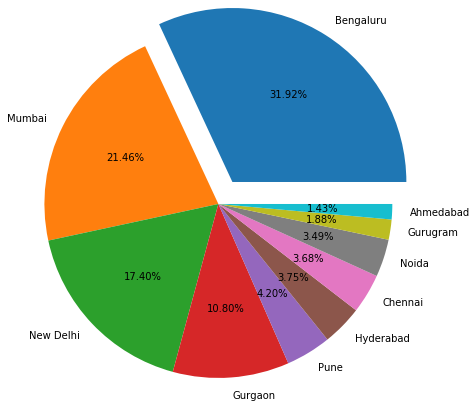

In [20]:
#Problem-2
#Which cities are generaaly chosen for starting a startup-->top 10
#plot a pie chart and visualise
#print city name and no. of startups
#print in descending order
#Highlight the max percentage

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

with open('Datasets/startup_funding.csv',encoding='utf8') as file_obj:
    file_data=csv.DictReader(file_obj,skipinitialspace=True)
    a=list(file_data)#list of lists
    city=[]
    for i in a:
        city.append(i['City  Location'])
    #print(city)
    np_city=np.array(city)
    np_city=np_city[np_city!='nan']
    for i in range(len(np_city)):
        if 'Bangalore' in np_city[i]:
            np_city[i]='Bengaluru'
        if 'Delhi' in np_city[i]:
            np_city[i]='New Delhi'
    #print(np_city)
    for i in range(len(np_city)):
        np_city[i]=np_city[i].split('/')[0].strip()#strip is for striping spaces
    #print(np_city)
        
    city_count=dict()
    for i in np_city:
        if i in city_count:
            city_count[i]+=1
        else:
            city_count[i]=1
    #print(city_count)
    xaxis=[]
    yaxis=[]
    for i in city_count:
        xaxis.append(i)
        yaxis.append(city_count[i])
    np_xaxis=np.array(xaxis)
    np_yaxis=np.array(yaxis)
    #print(xaxis)
    #print(yaxis)
    np_xaxis=np_xaxis[np.argsort(np_yaxis)]
    np_yaxis=np.sort(np_yaxis)
    #print(np_xaxis)
    #print(np_yaxis)
    np_xaxis=np_xaxis[len(np_xaxis)-1:len(np_xaxis)-1-10:-1]
    np_yaxis=np_yaxis[len(np_yaxis)-1:len(np_yaxis)-1-10:-1]
    #rint(np_xaxis)
    #print(np_yaxis)
    explode=np.zeros(len(np_yaxis))
    #print(explode)
    explode[np_yaxis.argmax()]=0.3
    #print(explode)
    plt.pie(np_yaxis,labels=np_xaxis,autopct="%.2f%%",radius=2,explode=explode)
    
    
    plt.show()     

#Note:
### we will use DataFrame.loc attribute to return the value present in the ‘Name’ column corresponding to the ‘Row_2’ label.

### return the value
result = df.loc['Row_2', 'Name']
  
### Print the result
print(result)

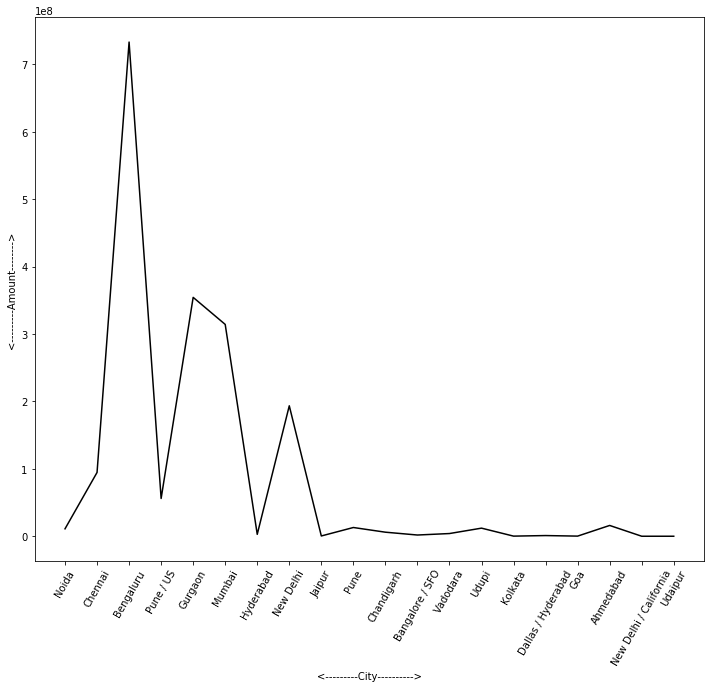

In [110]:
#Problem-3
#similar to problem 3 but using pandas
#funding percentage and city location
#plot bar graphs x=city,y=fundin
#NaN=null
#Not able to clean data properly so taking first 50 values
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt

data=pd.read_csv('Datasets/startup_funding.csv')

df=data.copy()
#print(df.index[df.City Location'].isnull()])

df.columns=['Sr_no','Date','Startup_Name','Industry_Vertical','SubVertical', 'City_Location', 'Investors_Name', 'InvestmentnType',
       'Amount_in_USD', 'Remarks']

#a=df.loc[df.index[df['City_Location']!='NaN']]
df=df[df['City_Location'].notna()]

df=df.drop(df.index[2604:2613])

df=df.drop(109)
df.reset_index(inplace=True,drop=True)
df.loc[df.Amount_in_USD.isnull(),'Amount_in_USD']='0'
df.loc[df.Amount_in_USD=='unknown','Amount_in_USD']='0'
df.loc[df.Amount_in_USD=='Undisclosed','Amount_in_USD']='0'
df.loc[df.Amount_in_USD=='undisclosed','Amount_in_USD']='0'
df.loc[df['City_Location']=='Bangalore','City_Location']='Bengaluru'
df.loc[df['City_Location']=='Delhi','City_Location']='New Delhi'


city=[]
amount=[]
for i in df.City_Location:
    city.append(i)

for i in df.Amount_in_USD:
    amount.append(i)


#string.join(iterable)
for i in range(len(amount)):
    amount[i]=''.join(amount[i].split(','))
np_city=np.array(city)
np_amt=np.array(amount)
np_city=np_city[len(np_city)-1:len(np_city)-1-200:-1]
np_amt=np_amt[len(np_amt)-1:len(np_amt)-1-200:-1]
np_amt=np.array(np_amt,dtype=int)
dic=dict()
for i in range(len(np_city)):
    if np_city[i] in dic:
        dic[np_city[i]]+=np_amt[i]
    else:
        dic[np_city[i]]=np_amt[i]
xaxis=[]
yaxis=[]
for i in dic.keys():
    xaxis.append(i)
    yaxis.append(dic[i])
plt.subplots(figsize=(12,10))
plt.plot(xaxis,yaxis,color="black")
plt.xticks(rotation=60)
plt.xlabel("<---------City---------->")
plt.ylabel("<---------Amount-------->")
plt.show()


#np_amt=np.array(np_amt,dtype=float)




#yet to be completed

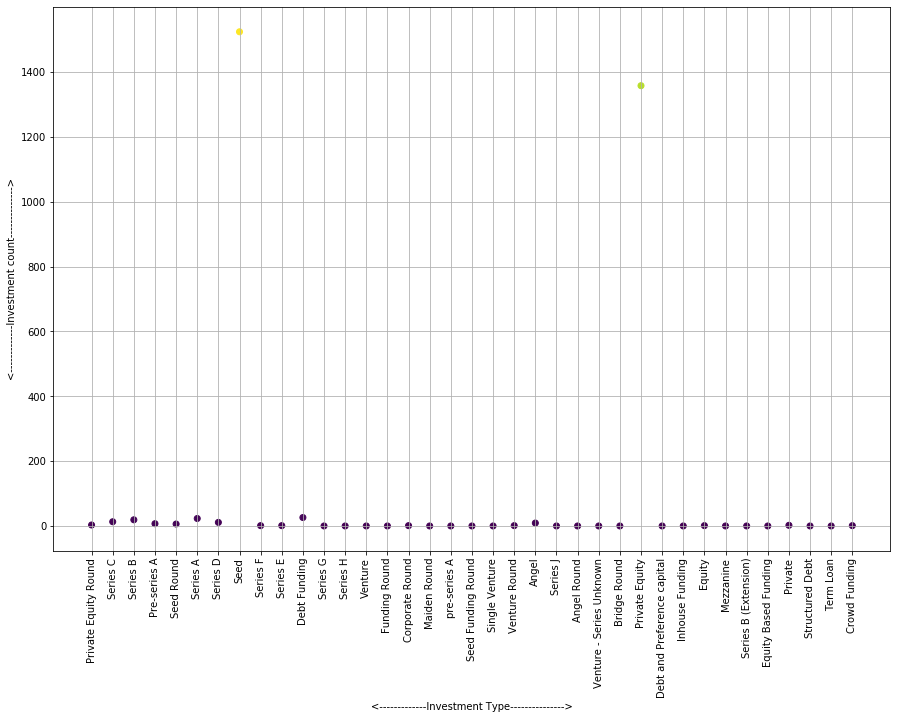

Private Equity Round   4
Series C   14
Series B   20
Pre-series A   8
Seed Round   7
Series A   24
Series D   12
Seed   1523
Series F   2
Series E   2
Debt Funding   27
Series G   1
Series H   1
Venture   1
Funding Round   1
Corporate Round   2
Maiden Round   1
pre-series A   1
Seed Funding Round   1
Single Venture   1
Venture Round   2
Angel   10
Series J   1
Angel Round   1
Venture - Series Unknown   1
Bridge Round   1
Private Equity   1357
Debt and Preference capital   1
Inhouse Funding   1
Equity   2
Mezzanine   1
Series B (Extension)   1
Equity Based Funding   1
Private   3
Structured Debt   1
Term Loan   1
Crowd Funding   2


In [100]:
#Problem-4
#Type of funding with percentage of each funding
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data=pd.read_csv('Datasets/startup_funding.csv',encoding='utf8')
df=data.copy()
df.columns=['Sr_no','Date','Startup_Name','Industry_Vertical','SubVertical', 'City_Location', 'Investors_Name', 'InvestmentnType',
       'Amount_in_USD', 'Remarks']
invest=[]
df=df[df.InvestmentnType.notna()]
df.loc[df.InvestmentnType=='Angel Funding','InvestmentnType']='Angel'
df.loc[df.InvestmentnType=='Crowd funding','InvestmentnType']='Crowd Funding'
df.loc[df.InvestmentnType=='Debt','InvestmentnType']='Debt Funding'
df.loc[df.InvestmentnType=='Debt-Funding','InvestmentnType']='Debt Funding'
df.loc[df.InvestmentnType=='Private Funding','InvestmentnType']='Private'
df.loc[df.InvestmentnType=='Pre-Series A','InvestmentnType']='Pre-series A'
df.loc[df.InvestmentnType=='Pre Series A','InvestmentnType']='Pre-series A'
df.loc[df.InvestmentnType=='pre-Series A','InvestmentnType']='Pre-series A'
df.loc[df.InvestmentnType=='PrivateEquity','InvestmentnType']='Private Equity'
df.loc[df.InvestmentnType=='Seed Funding','InvestmentnType']='Seed'
df.loc[df.InvestmentnType=='Seed funding','InvestmentnType']='Seed'
for i in df.InvestmentnType:
    invest.append(i)

np_invest=np.array(invest)
#np.unique(np_invest)
for i in range(len(np_invest)):
    np_invest[i]=np_invest[i].split('/')[0].strip()
    np_invest[i]=np_invest[i].split('\\')[0].strip()
dic=dict()
for i in np_invest:
    if i in dic:
        dic[i]+=1
    else:
        dic[i]=1
xaxis=[]
yaxis=[]
for i in dic.keys():
    xaxis.append(i)
    yaxis.append(dic[i])
plt.subplots(figsize=(15, 10))
plt.scatter(xaxis,yaxis,c=yaxis)
plt.xlabel("<-------------Investment Type--------------->")
plt.ylabel("<-------------Investment count-------------->")
plt.xticks(size=10,rotation=90)
plt.grid()
plt.show()

for i in dic.keys():
    print(i," ",dic[i])



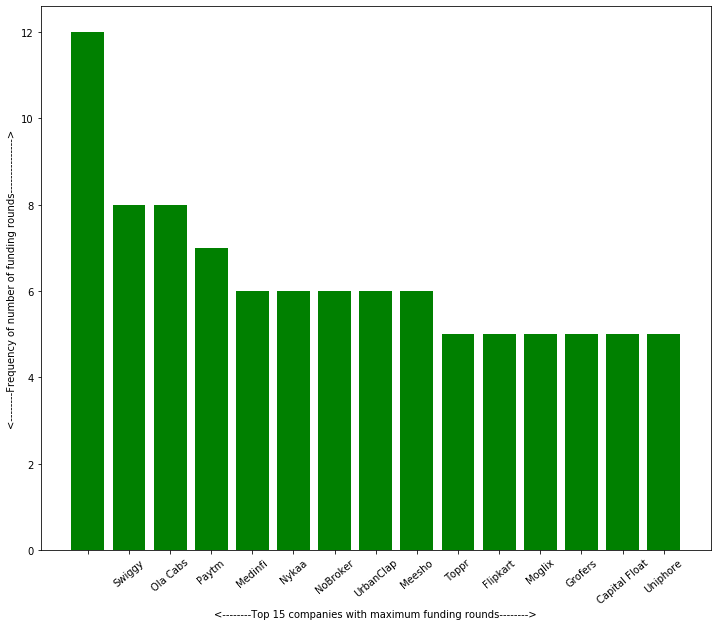

In [13]:
#Problem-5
#Startups getting fundings the maximum number of times


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data=pd.read_csv('Datasets/startup_funding.csv',encoding='utf_8')
df=data.copy()
df.columns=['Sr_no','Date','Startup_Name','Industry_Vertical','SubVertical', 'City_Location', 'Investors_Name', 'InvestmentnType',
       'Amount_in_USD', 'Remarks']
name=[]
for i in df.Startup_Name:
    name.append(i)

for i in range(len(name)):
    name[i]=name[i].split('\\')[0]
np_name=np.array(name)
dic=dict()
for i in np_name:
    if i in dic:
        dic[i]+=1
    else:
        dic[i]=1
xaxis=[]
yaxis=[]
for i in dic.keys():
    xaxis.append(i)
    yaxis.append(dic[i])
np_x=np.array(xaxis)
np_y=np.array(yaxis)
np_x=np_x[np.argsort(np_y)]
np_y=np.sort(np_y)
np_x=np_x[len(np_x)-1:len(np_x)-1-15:-1]
np_y=np_y[len(np_y)-1:len(np_y)-1-15:-1]
plt.subplots(figsize=(12,10))
plt.bar(np_x,np_y,color="green")
plt.xticks(rotation=40)
plt.xlabel("<--------Top 15 companies with maximum funding rounds-------->")
plt.ylabel("<--------Frequency of number of funding rounds--------------->")

plt.show()